In [4]:
# As usual, a bit of setup

import numpy as np
import matplotlib.pyplot as plt
from deeplearning.classifiers.cnn import *
from deeplearning.data_utils import get_CIFAR10_data
from deeplearning.gradient_check import eval_numerical_gradient_array, eval_numerical_gradient
from deeplearning.layers import *
from deeplearning.fast_layers import *
from deeplearning.solver import Solver

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# Load the (preprocessed) CIFAR10 data.

data = get_CIFAR10_data()

In [6]:
# Train a really good model on CIFAR-10
from deeplearning.classifiers.convnet2 import *
model = HaoConvNet2(weight_scale=0.006, hidden_dim=512, reg=0.001, dropout=0.5)

solver = Solver(model, data,
                num_epochs=30, batch_size=128,
                update_rule='sgd_momentum',
                lr_decay = 0.9,
                optim_config={
                  'learning_rate': 1e-1,
                },
                verbose=True, print_every=60)
solver.train()

(Iteration 1 / 11460) loss: 2.305446
(Epoch 0 / 30) train acc: 0.123000; val_acc: 0.117000
(Iteration 61 / 11460) loss: 1.503746
(Iteration 121 / 11460) loss: 1.852936
(Iteration 181 / 11460) loss: 1.720787
(Iteration 241 / 11460) loss: 1.554097
(Iteration 301 / 11460) loss: 1.539318
(Iteration 361 / 11460) loss: 1.410804
Time elapsed (hh:mm:ss.ms) 0:08:57.518498
(Epoch 1 / 30) train acc: 0.508000; val_acc: 0.516000
(Iteration 421 / 11460) loss: 1.481002
(Iteration 481 / 11460) loss: 1.363799
(Iteration 541 / 11460) loss: 1.481030
(Iteration 601 / 11460) loss: 1.340213
(Iteration 661 / 11460) loss: 1.398387
(Iteration 721 / 11460) loss: 1.504295
Time elapsed (hh:mm:ss.ms) 0:17:46.891636
(Epoch 2 / 30) train acc: 0.625000; val_acc: 0.628000
(Iteration 781 / 11460) loss: 1.448122
(Iteration 841 / 11460) loss: 1.176039
(Iteration 901 / 11460) loss: 1.385645
(Iteration 961 / 11460) loss: 1.204479
(Iteration 1021 / 11460) loss: 1.161599
(Iteration 1081 / 11460) loss: 1.199679
(Iteration 114

(Iteration 8941 / 11460) loss: 0.699980
(Iteration 9001 / 11460) loss: 0.777684
(Iteration 9061 / 11460) loss: 0.814658
(Iteration 9121 / 11460) loss: 0.738684
Time elapsed (hh:mm:ss.ms) 2:02:45.582611
(Epoch 24 / 30) train acc: 0.842000; val_acc: 0.767000
(Iteration 9181 / 11460) loss: 0.741901
(Iteration 9241 / 11460) loss: 0.712938
(Iteration 9301 / 11460) loss: 0.652465
(Iteration 9361 / 11460) loss: 0.666540
(Iteration 9421 / 11460) loss: 0.629838
(Iteration 9481 / 11460) loss: 0.696051
(Iteration 9541 / 11460) loss: 0.714835
Time elapsed (hh:mm:ss.ms) 2:08:04.569523
(Epoch 25 / 30) train acc: 0.829000; val_acc: 0.750000
(Iteration 9601 / 11460) loss: 0.643631
(Iteration 9661 / 11460) loss: 0.715492
(Iteration 9721 / 11460) loss: 0.644933
(Iteration 9781 / 11460) loss: 0.788397
(Iteration 9841 / 11460) loss: 0.651773
(Iteration 9901 / 11460) loss: 0.619533
Time elapsed (hh:mm:ss.ms) 2:13:08.743416
(Epoch 26 / 30) train acc: 0.836000; val_acc: 0.760000
(Iteration 9961 / 11460) loss

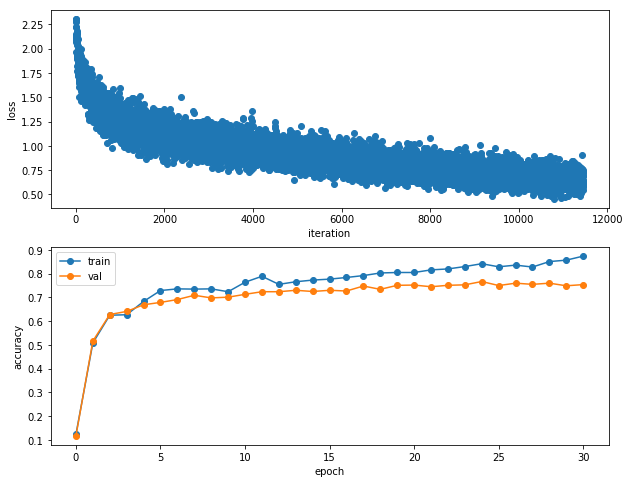

In [7]:
plt.subplot(2, 1, 1)
plt.plot(solver.loss_history, 'o')
plt.xlabel('iteration')
plt.ylabel('loss')

plt.subplot(2, 1, 2)
plt.plot(solver.train_acc_history, '-o')
plt.plot(solver.val_acc_history, '-o')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [8]:
test_acc = solver.check_accuracy(data['X_test'], data['y_test'])
print 'test acc: %f' % (test_acc)

test acc: 0.741000


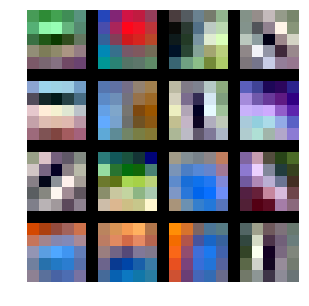

In [9]:
from deeplearning.vis_utils import visualize_grid

grid = visualize_grid(model.params['W0'].transpose(0, 2, 3, 1))
plt.imshow(grid.astype('uint8'))
plt.axis('off')
plt.gcf().set_size_inches(5, 5)
plt.show()

In [10]:
import pickle
with open('result_convnet2_2', 'wb') as f:
    pickle.dump([solver.loss_history, solver.train_acc_history,solver.val_acc_history], f)